In [10]:
#영문 문서 제목의 키워드 분석하기 + 워드클라우드

In [9]:
!pip install matplotlib
!pip install wordcloud

In [21]:
import pandas as pd
import glob
import re
from functools import reduce
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import STOPWORDS, WordCloud

In [22]:
#10개의 엑셀 파일 이름을 all_files 리스트에 저장

all_files = glob.glob('8-1_data\\myCabinetExcelData*.xls') #myCabinetExcelData로 시작하는 파일들의 <<이름>> 모두 리스트에 저장
all_files #출력하여 내용 확인

['8-1_data\\myCabinetExcelData (1).xls',
 '8-1_data\\myCabinetExcelData (2).xls',
 '8-1_data\\myCabinetExcelData (3).xls',
 '8-1_data\\myCabinetExcelData (4).xls',
 '8-1_data\\myCabinetExcelData (5).xls',
 '8-1_data\\myCabinetExcelData (6).xls',
 '8-1_data\\myCabinetExcelData (7).xls',
 '8-1_data\\myCabinetExcelData (8).xls',
 '8-1_data\\myCabinetExcelData (9).xls',
 '8-1_data\\myCabinetExcelData.xls']

In [23]:
#all_files 리스트의 파일 이름 이용 - 파일 내용을 all_files_data에 추가

all_files_data = [] #저장할리스트
for file in all_files:
    data_frame = pd.read_excel(file) #엑셀파일읽어오고
    all_files_data.append(data_frame) #all_files_data에 파일내용추가
all_files_data[0]

,Unnamed: 0,번호,제목,저자,출판사,출판일
0,NaN,1,Guest Editorial: Big Media Data: Understanding...,"Wang, J.; Qi, G.; Sebe, N.; Aggarwal, C. C.",unknown,2015
1,NaN,2,Guest Editorial: Big Scholar Data Discovery an...,"Lin, Y.; Tong, H.; Tang, J.; Candan, K. S.",unknown,2016
2,NaN,3,Guest Editorial: Big Data Analytics and the Web,"Sheng, M.; Vasilakos, A. V.; Yu, Q.; You, L.",unknown,2016
3,NaN,4,Parallel computing for preserving privacy usin...,"Yaji, Sharath; Neelima, B.",Inderscience,2018
4,NaN,5,NoSQL databases for big data,"Oussous, Ahmed; Benjelloun, Fatima-Zahra; Lahc...",Inderscience,2017
...,...,...,...,...,...,...
95,NaN,96,Smart city big data analytics: An advanced review,"Soomro, Kamran; Bhutta, Muhammad Nasir Mumtaz;...",John Wiley & Sons Ltd,2019
96,NaN,97,A watchdog approach - name-matching algorithm ...,"Kirubakaran, Anusuya; Aramudhan, M.",Inderscience,2018
97,NaN,98,An intelligent approach to Big Data analytics ...,"Verma, Neha; Singh, Jatinder",Emerald Group Publishing Limited,2017
98,NaN,99,How organisations leverage Big Data: a maturit...,"Comuzzi, Marco; Patel, Anit",Emerald Group Publishing Limited,2016


In [24]:
#all_files_data를 (세로축기준) 모두 하나로 병합해 all_files_data_concat리스트

all_files_data_concat = pd.concat(all_files_data, axis=0,
                                 ignore_index = True) #axis=0 : 세로축 기준 병합
all_files_data_concat #출력하여 내용 확인 (모든 데이터 총합)

,Unnamed: 0,번호,제목,저자,출판사,출판일
0,NaN,1,Guest Editorial: Big Media Data: Understanding...,"Wang, J.; Qi, G.; Sebe, N.; Aggarwal, C. C.",unknown,2015
1,NaN,2,Guest Editorial: Big Scholar Data Discovery an...,"Lin, Y.; Tong, H.; Tang, J.; Candan, K. S.",unknown,2016
2,NaN,3,Guest Editorial: Big Data Analytics and the Web,"Sheng, M.; Vasilakos, A. V.; Yu, Q.; You, L.",unknown,2016
3,NaN,4,Parallel computing for preserving privacy usin...,"Yaji, Sharath; Neelima, B.",Inderscience,2018
4,NaN,5,NoSQL databases for big data,"Oussous, Ahmed; Benjelloun, Fatima-Zahra; Lahc...",Inderscience,2017
...,...,...,...,...,...,...
995,NaN,96,Guest Editorial: Big Media Data: Understanding...,"Wang, J.; Qi, G.; Sebe, N.; Aggarwal, C.",unknown,2017
996,NaN,97,Guest Editorial: Big Scholar Data Discovery an...,"Lin, Y.; Tong, H.; Tang, J.; Candan, K. S.",unknown,2017
997,NaN,98,Guest Editorial: Big Media Data: Understanding...,"Wang, J.; Qi, G.; Sebe, N.; Aggarwal, C. C.",unknown,2016
998,NaN,99,Speed Up Big Data Analytics by Unveiling the S...,"Wang, J.; Zhang, X.; Yin, J.; Wang, R.; Wu, H....",unknown,2018


In [25]:
#all_files_data_concat(전체데이터)의 제목 추출해 all_title에 저장

all_title = all_files_data_concat['제목']
all_title

0      Guest Editorial: Big Media Data: Understanding...
1      Guest Editorial: Big Scholar Data Discovery an...
2        Guest Editorial: Big Data Analytics and the Web
3      Parallel computing for preserving privacy usin...
4                           NoSQL databases for big data
                             ...                        
995    Guest Editorial: Big Media Data: Understanding...
996    Guest Editorial: Big Scholar Data Discovery an...
997    Guest Editorial: Big Media Data: Understanding...
998    Speed Up Big Data Analytics by Unveiling the S...
999          Architecting Time-Critical Big-Data Systems
Name: 제목, Length: 1000, dtype: object

In [31]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LG\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\LG\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\LG\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


True

In [27]:
#전처리를 위한 준비

stopWords = set(stopwords.words("english")) #영어불용어를 불러와 저장
lemma = WordNetLemmatizer() #표제어 추출 작업 제공하는 객체 생성

In [32]:
words = []

for title in all_title:
    EnWords = re.sub(r"[^a-zA-Z]+", " ", str(title)) #알파벳으로 시작하지 않는 단어는 공백으로 치환해 제거
    EnWordsToken = word_tokenize(EnWords.lower()) #소문자로 정규화
    EnWordsTokenStop = [w for w in EnWordsToken if w not in stopWords] #단어 토큰화, 불용어 제거
    EnWordsTokenStopLemma = [lemma.lemmatize(w) for w in EnWordsTokenStop] #펴제어 추출
    words.append(EnWordsTokenStopLemma)
    
print(words) #출력하여 확인

[['guest', 'editorial', 'big', 'medium', 'data', 'understanding', 'search', 'mining', 'part'], ['guest', 'editorial', 'big', 'scholar', 'data', 'discovery', 'collaboration'], ['guest', 'editorial', 'big', 'data', 'analytics', 'web'], ['parallel', 'computing', 'preserving', 'privacy', 'using', 'k', 'anonymisation', 'algorithm', 'big', 'data'], ['nosql', 'database', 'big', 'data'], ['computation', 'migration', 'new', 'approach', 'execute', 'big', 'data', 'bioinformatics', 'workflow'], ['towards', 'real', 'time', 'big', 'data', 'analytics', 'platform', 'health', 'application'], ['new', 'approach', 'accurate', 'distributed', 'cluster', 'analysis', 'big', 'data', 'competitive', 'k', 'mean'], ['five', 'layer', 'architecture', 'big', 'data', 'processing', 'analytics'], ['towards', 'max', 'min', 'fair', 'resource', 'allocation', 'stream', 'big', 'data', 'analytics', 'shared', 'cloud'], ['large', 'scale', 'spectral', 'clustering', 'managing', 'big', 'data', 'healthcare', 'operation'], ['hierarc

In [34]:
words2 = list(reduce(lambda x, y:x+y, words))
print(words2)

['guest', 'editorial', 'big', 'medium', 'data', 'understanding', 'search', 'mining', 'part', 'guest', 'editorial', 'big', 'scholar', 'data', 'discovery', 'collaboration', 'guest', 'editorial', 'big', 'data', 'analytics', 'web', 'parallel', 'computing', 'preserving', 'privacy', 'using', 'k', 'anonymisation', 'algorithm', 'big', 'data', 'nosql', 'database', 'big', 'data', 'computation', 'migration', 'new', 'approach', 'execute', 'big', 'data', 'bioinformatics', 'workflow', 'towards', 'real', 'time', 'big', 'data', 'analytics', 'platform', 'health', 'application', 'new', 'approach', 'accurate', 'distributed', 'cluster', 'analysis', 'big', 'data', 'competitive', 'k', 'mean', 'five', 'layer', 'architecture', 'big', 'data', 'processing', 'analytics', 'towards', 'max', 'min', 'fair', 'resource', 'allocation', 'stream', 'big', 'data', 'analytics', 'shared', 'cloud', 'large', 'scale', 'spectral', 'clustering', 'managing', 'big', 'data', 'healthcare', 'operation', 'hierarchical', 'distributed', 

In [35]:
# 데이터 탐색 - 단어 빈도 구하기 - (1)
count = Counter(words2) #출현 횟수 계산해 딕셔너리 객체 count 생성
count #출력하여 내용 확인

Counter({'guest': 12,
         'editorial': 17,
         'big': 1354,
         'medium': 11,
         'data': 1645,
         'understanding': 11,
         'search': 7,
         'mining': 40,
         'part': 1,
         'scholar': 3,
         'discovery': 13,
         'collaboration': 5,
         'analytics': 137,
         'web': 9,
         'parallel': 5,
         'computing': 25,
         'preserving': 2,
         'privacy': 17,
         'using': 57,
         'k': 7,
         'anonymisation': 1,
         'algorithm': 17,
         'nosql': 4,
         'database': 11,
         'computation': 2,
         'migration': 4,
         'new': 38,
         'approach': 44,
         'execute': 1,
         'bioinformatics': 2,
         'workflow': 3,
         'towards': 12,
         'real': 14,
         'time': 17,
         'platform': 19,
         'health': 37,
         'application': 25,
         'accurate': 3,
         'distributed': 18,
         'cluster': 2,
         'analysis': 67,
         

In [36]:
# 데이터 탐색 - 단어 빈도 구하기 - (2)
word_count = dict()

for tag, counts in count.most_common(50): #출현 횟수가 가장 많은 상위 50개 단어 중
    if(len(str(tag))>1): #단어 길잉가 1보다 큰 것
        word_count[tag] = counts #word_count 딕셔너리에 저장
        print("%s : %d" % (tag, counts)) #출력하여 확인

data : 1645
big : 1354
analytics : 137
analysis : 67
based : 62
using : 57
system : 50
science : 50
management : 48
challenge : 47
approach : 44
mining : 40
new : 38
research : 38
health : 37
model : 37
cloud : 34
smart : 34
learning : 33
opportunity : 31
processing : 30
technology : 28
small : 27
framework : 26
information : 26
computing : 25
application : 25
driven : 24
social : 24
issue : 24
quality : 23
network : 23
deal : 23
knowledge : 22
efficient : 22
review : 22
use : 22
era : 22
healthcare : 21
storage : 21
service : 21
perspective : 21
open : 20
platform : 19
survey : 19
making : 19
process : 19
distributed : 18
large : 18
environment : 18


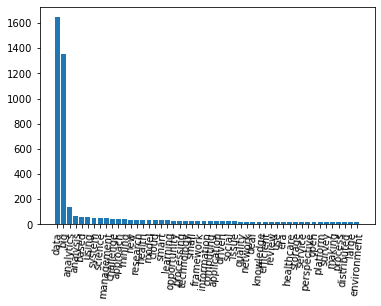

In [37]:
# 데이터 탐색 - 히스토그램 그리기

sorted_Keys = sorted(word_count, key=word_count.get, reverse=True)
sorted_Values = sorted(word_count.values(), reverse=True)
plt.bar(range(len(word_count)), sorted_Values, align='center')
plt.xticks(range(len(word_count)), list(sorted_Keys), rotation='85')
plt.show()

In [39]:
#결과 시각화 - 그래프 그리기
##(1) 연도별 학술문서 수를 추출

all_files_data_concat['doc_count']=0
summary_year = all_files_data_concat.groupby('출판일', as_index=False)['doc_count'].count()
summary_year

,출판일,doc_count
0,1994,1
1,1995,1
2,1996,1
3,1998,3
4,2002,4
5,2003,1
6,2004,3
7,2005,3
8,2007,2
9,2008,3


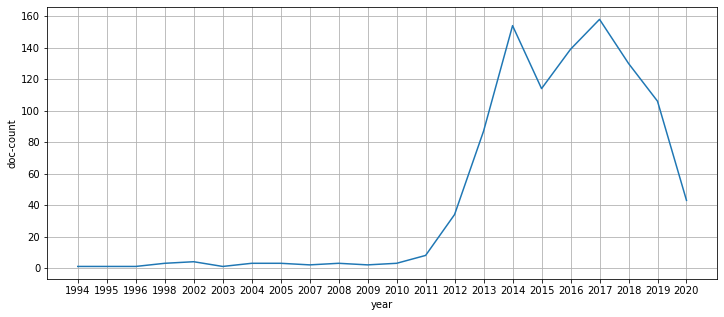

In [40]:
#결과 시각화 - 그래프 그리기
##(2) 연도별 학술문서 수를 래프로 그리기

plt.figure(figsize = (12, 5))
plt.xlabel("year")
plt.ylabel("doc-count")
plt.grid(True)
plt.plot(range(len(summary_year)), summary_year['doc_count'])
plt.xticks(range(len(summary_year)), [text for text in summary_year['출판일']])
plt.show()

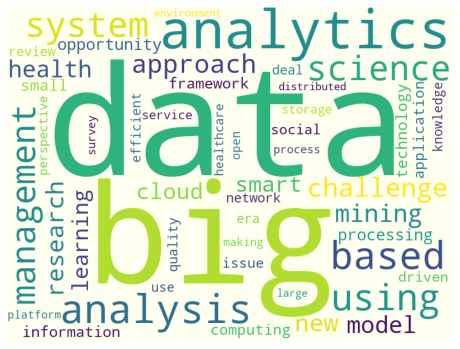

In [42]:
#결과 시각화 - 워드클라우드
##(1) 워드클라우드 생성 및 보이기

stopwords = set(STOPWORDS) #불용어 설정
wc = WordCloud(background_color = 'ivory', stopwords = stopwords,
              width = 800, height = 600) #워드 클라우드 객체 생성
cloud = wc.generate_from_frequencies(word_count) #word_count 데이터를 담아 cloud 객체 생성

#matplotlib.pyplot을 사용해 생성한 워드클라우드 객체 보이기
plt.figure(figsize = (8,8))
plt.imshow(cloud)
plt.axis('off')
plt.show()

In [43]:
#결과 시각화 - 워드클라우드
##(2) 이미지로 저장
cloud.to_file("8-1_data\\riss_bigdata_wordCloud.jpg")